# NLP Sentiment Analysis of the Amber Heard case using Twitter API for Data

### Introduction
It is being said that the internet had already decided that Amber Heard was guilty from the beginning. Out of curiosity, I have decided to process some tweets from twitter and perform some sentiment analysis to see if this was the case.

### Aim
The purpose of this notebook is to confirm or deny that the internet (twitter) already decided that Amber Heard was guilty. In other words, majority of the people thought that Amber Heard was guilty.

### 1. Getting the Data
Using the tweepy library. I used a script (twitter_scrape.py) that was adapted from geeks.com to grab 1000 tweets and store it in a csv file. Since we want to explore the sentiments towards Amber Heard, I used the script to search for the hashtag #amberheard

In [138]:
#Read in the stored Data
import pandas as pd
df = pd.read_csv('scraped_tweets_3.csv')

In [173]:
#View Data
df.head(50)

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,bollywood_life,"Know what's trending in Bollywood. Catch up with the latest celebrity news, gossips, movie reviews and much more| Zee Media",Mumbai,731,767424,161424,0,Johnny Depp vs Amber Heard case: Salman Khan's costar comes out in strong support of Aquaman actress; gives it back to trolls \n #AmberHeard #Aquaman #EntertainmentNews #JohnnyDepp #PiratesOfTheCaribbean \n https://t.co/f3o1dO0P7l,"['AmberHeard', 'Aquaman', 'EntertainmentNews', 'JohnnyDepp', 'PiratesOfTheCaribbean']"
1,1,Madame9Roux,"You are a blip on the radar screen here. 🔥🔥🔥 I block addicts and morons. Psychic attacks returned wrapped in killer Shawnee spell. Don't mess with 30,000 yrs",NaN,561,240,13907,1,"My oped on @EMPIREREPORTNY The “Mutinous Women” Book, Stories Similar 2 Women’s Stories 2day - #AmberHeard #JohnnyDepp #AndrewCuomo #RoeVWade Author, Joan DeJean\n@Biaggi4NY @CarlinaRivera @yuhline @JuliaCarmel__ @rontkim @jessicaramos @RepKathleenRice \nhttps://t.co/EnJBHRi3po… https://t.co/gL8F80qlI5","['AmberHeard', 'JohnnyDepp']"
2,2,JamesMa63034226,NaN,NaN,159,105,9852,1,Congratulations #CamilleVasquez! The attorney is considered the breakout star of the #JohnnyDepp Defamation Trial and was just promoted to partner. \n\nHer cross-examination of #AmberHeard was a major turning point in this trial.\n\nWATCH #CourtTV LIVE - https://t.co/tnYdPcDRMU https://t.co/KpAPgbGhJL,"['CamilleVasquez', 'JohnnyDepp']"
3,3,bmurphy63,"Grew up in Pittsburgh and moved to Atlanta. Fan of the Steelers, Penguins, Pirates, Pitt, & McEachern HS. Fur dad to Willow & Kit!","Marietta, GA. USA",5001,3976,39791,115,The reality of what #AmberHeard has done.\n\n#DeppHeardTrial\n#AmberHeardCommittedPerjury\n#AmberTurd #AmberHeardlsApsychopath\n#NewJobsForAmberHeard\n#AmberHeardDeservesPrison https://t.co/7xUIxroihJ,"['AmberHeard', 'DeppHeardTrial', 'AmberHeardCommittedPerjury', 'AmberTurd', 'AmberHeardlsApsychopath']"
4,4,CourtTV,Your front row seat to justice.\n\nHOW TO WATCH: https://t.co/TU1NxK0Ui6,"Atlanta, GA",48,63054,9121,1,Congratulations #CamilleVasquez! The attorney is considered the breakout star of the #JohnnyDepp Defamation Trial and was just promoted to partner. \n\nHer cross-examination of #AmberHeard was a major turning point in this trial.\n\nWATCH #CourtTV LIVE - https://t.co/tnYdPcDRMU https://t.co/KpAPgbGhJL,"['CamilleVasquez', 'JohnnyDepp', 'AmberHeard', 'CourtTV']"
5,5,evamalya,❤️Love #Shinee #Ateez #MonstaX #ØMI #OneOkRock \n🎥Cinéphile\n💜💙#SamYu #EarthMixx🌏🪐#ZeeNunew #OhmNanon #WeiChun #MaxTul #MaxNat #Malec #Malex \n💗 Asian Music,France,356,104,44865,115,The reality of what #AmberHeard has done.\n\n#DeppHeardTrial\n#AmberHeardCommittedPerjury\n#AmberTurd #AmberHeardlsApsychopath\n#NewJobsForAmberHeard\n#AmberHeardDeservesPrison https://t.co/7xUIxroihJ,"['AmberHeard', 'DeppHeardTrial', 'AmberHeardCommittedPerjury', 'AmberTurd', 'AmberHeardlsApsychopath']"
6,6,twofortysevenam,NaN,NaN,14,2,35,115,The reality of what #AmberHeard has done.\n\n#DeppHeardTrial\n#AmberHeardCommittedPerjury\n#AmberTurd #AmberHeardlsApsychopath\n#NewJobsForAmberHeard\n#AmberHeardDeservesPrison https://t.co/7xUIxroihJ,"['AmberHeard', 'DeppHeardTrial', 'AmberHeardCommittedPerjury', 'AmberTurd', 'AmberHeardlsApsychopath']"
7,7,optimieren1,#AbuseHasNoGender,nowhere nearby Amber Turd,35,7,1673,115,The reality of what #AmberHeard has done.\n\n#DeppHeardTrial\n#AmberHeardCommittedPerjury\n#AmberTurd #AmberHeardlsApsychopath\n#NewJobsForAmberHeard\n#AmberHeardDeservesPrison https://t.co/7xUIxroihJ,"['AmberHeard', 'DeppHeardTrial', 'AmberHeardCommittedPerjury', 'AmberTurd', 'AmberHeardlsApsychopath']"
8,8,Klaybabies,"Public defender fighting the good fight.Outside of work my passion is horses, sailing, and my son.",NaN,1336,233,7033,0,"@ChristinaPykles I suspect the source who told ET was #AmberHeard. She likes to be the center of attention and has a history of doing it. Notice how she clings

In [140]:
#There are a number of things I can do with this data, but I will start by extracting the tweet and cleaning it
df_tweets = df[['text']]

In [141]:
#check the new dataframe
df_tweets.head()

,text
0,Johnny Depp vs Amber Heard case: Salman Khan's costar comes out in strong support of Aquaman actress; gives it back to trolls \n #AmberHeard #Aquaman #EntertainmentNews #JohnnyDepp #PiratesOfTheCaribbean \n https://t.co/f3o1dO0P7l
1,"My oped on @EMPIREREPORTNY The “Mutinous Women” Book, Stories Similar 2 Women’s Stories 2day - #AmberHeard #JohnnyDepp #AndrewCuomo #RoeVWade Author, Joan DeJean\n@Biaggi4NY @CarlinaRivera @yuhline @JuliaCarmel__ @rontkim @jessicaramos @RepKathleenRice \nhttps://t.co/EnJBHRi3po… https://t.co/gL8F80qlI5"
2,Congratulations #CamilleVasquez! The attorney is considered the breakout star of the #JohnnyDepp Defamation Trial and was just promoted to partner. \n\nHer cross-examination of #AmberHeard was a major turning point in this trial.\n\nWATCH #CourtTV LIVE - https://t.co/tnYdPcDRMU https://t.co/KpAPgbGhJL
3,The reality of what #AmberHeard has done.\n\n#DeppHeardTrial\n#AmberHeardCommittedPerjury\n#AmberTurd #AmberHeardlsApsychopath\n#NewJobsForAmberHeard\n#AmberHeardDeservesPrison https://t.co/7xUIxroihJ
4,Congratulations #CamilleVasquez! The attorney is considered the breakout star of the #JohnnyDepp Defamation Trial and was just promoted to partner. \n\nHer cross-examination of #AmberHeard was a major turning point in this trial.\n\nWATCH #CourtTV LIVE - https://t.co/tnYdPcDRMU https://t.co/KpAPgbGhJL


In [142]:
#Take a look at a sample of the raw text
df_tweets['text'].head()

0                                                                             Johnny Depp vs Amber Heard case: Salman Khan's costar comes out in strong support of Aquaman actress; gives it back to trolls \n #AmberHeard #Aquaman #EntertainmentNews #JohnnyDepp #PiratesOfTheCaribbean \n https://t.co/f3o1dO0P7l
1    My oped on @EMPIREREPORTNY The “Mutinous Women” Book, Stories Similar 2 Women’s Stories 2day - #AmberHeard #JohnnyDepp #AndrewCuomo #RoeVWade Author, Joan DeJean\n@Biaggi4NY @CarlinaRivera @yuhline @JuliaCarmel__ @rontkim @jessicaramos @RepKathleenRice \nhttps://t.co/EnJBHRi3po… https://t.co/gL8F80qlI5
2     Congratulations #CamilleVasquez! The attorney is considered the breakout star of the #JohnnyDepp Defamation Trial and was just promoted to partner. \n\nHer cross-examination of #AmberHeard was a major turning point in this trial.\n\nWATCH #CourtTV LIVE - https://t.co/tnYdPcDRMU https://t.co/KpAPgbGhJL
3                                                                        

### 2. Cleaning the data

In [143]:
#Transform to lowercase and remove punctuation
import re
import string

def clean_text1(text):
    '''Make text lowercase, remove text in square brackets,remove newline, remove quotes, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean1 = lambda x: clean_text1(x)

In [144]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(df['text'].apply(clean1))
data_clean

,text
0,johnny depp vs amber heard case salman khans costar comes out in strong support of aquaman actress gives it back to trolls amberheard aquaman entertainmentnews johnnydepp piratesofthecaribbean
1,my oped on empirereportny the mutinous women book stories similar womens stories amberheard johnnydepp andrewcuomo roevwade author joan dejean carlinarivera yuhline juliacarmel rontkim jessicaramos repkathleenrice
2,congratulations camillevasquez the attorney is considered the breakout star of the johnnydepp defamation trial and was just promoted to partner her crossexamination of amberheard was a major turning point in this trial watch courttv live httpstcotnydpcdrmu httpstcokpapgbghjl
3,the reality of what amberheard has done deppheardtrial amberheardcommittedperjury amberturd amberheardlsapsychopath newjobsforamberheard amberhearddeservesprison
4,congratulations camillevasquez the attorney is considered the breakout star of the johnnydepp defamation trial and was just promoted to partner her crossexamination of amberheard was a major turning point in this trial watch courttv live httpstcotnydpcdrmu httpstcokpapgbghjl
...,...
995,someone jokingly said that amberheard should become a muslim now he was spot on since muslims love converting vulnerable or troubled people a rich saudi man seizes his opportunity and makes a marriage proposal to amber heard
996,it does not matter that the victims of domestic violence are male they can be victims regardless of gender men in particular have a hard time saying that they are being beaten by their female partners johnnydepp johnnydeppamberheardtrial amberheard justiceforjohnnydepp
997,amberheard amp her sister whitneyhenriquez joined at the hip by their perjurious statements in the bombshell defamation trial with johnny depp continue their attempts to gaslight the public in spite of the verdict that found amber liable for defamation httpstcotcqthfdyej
998,secondlya russian and a nonrussian citizen must understand that nato is the official sponsor of wars and the russian had no choice but to defend the sovereignty of his country to death russian ukraine putin nato america amberheard zelensky russia usa biden httpstcorxmlrlchwl


In [145]:
#Expand the width of the column for better readability

#data_clean.style.set_properties(subset=['text'], **{'width': '300px'})
#from pandas import option_context

#with option_context('display.max_colwidth', None):
    #display(data_clean.head(20))
pd.set_option('max_colwidth', None)

In [146]:
#Trying to remove emoji with this code that I found on stackoverflow
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [147]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean['text'].apply(remove_emoji))
data_clean

,text
0,johnny depp vs amber heard case salman khans costar comes out in strong support of aquaman actress gives it back to trolls amberheard aquaman entertainmentnews johnnydepp piratesofthecaribbean
1,my oped on empirereportny the mutinous women book stories similar womens stories amberheard johnnydepp andrewcuomo roevwade author joan dejean carlinarivera yuhline juliacarmel rontkim jessicaramos repkathleenrice
2,congratulations camillevasquez the attorney is considered the breakout star of the johnnydepp defamation trial and was just promoted to partner her crossexamination of amberheard was a major turning point in this trial watch courttv live httpstcotnydpcdrmu httpstcokpapgbghjl
3,the reality of what amberheard has done deppheardtrial amberheardcommittedperjury amberturd amberheardlsapsychopath newjobsforamberheard amberhearddeservesprison
4,congratulations camillevasquez the attorney is considered the breakout star of the johnnydepp defamation trial and was just promoted to partner her crossexamination of amberheard was a major turning point in this trial watch courttv live httpstcotnydpcdrmu httpstcokpapgbghjl
...,...
995,someone jokingly said that amberheard should become a muslim now he was spot on since muslims love converting vulnerable or troubled people a rich saudi man seizes his opportunity and makes a marriage proposal to amber heard
996,it does not matter that the victims of domestic violence are male they can be victims regardless of gender men in particular have a hard time saying that they are being beaten by their female partners johnnydepp johnnydeppamberheardtrial amberheard justiceforjohnnydepp
997,amberheard amp her sister whitneyhenriquez joined at the hip by their perjurious statements in the bombshell defamation trial with johnny depp continue their attempts to gaslight the public in spite of the verdict that found amber liable for defamation httpstcotcqthfdyej
998,secondlya russian and a nonrussian citizen must understand that nato is the official sponsor of wars and the russian had no choice but to defend the sovereignty of his country to death russian ukraine putin nato america amberheard zelensky russia usa biden httpstcorxmlrlchwl


### 3. Prepare the data for exploration and sentiment analysis 

#### Document Term Matrix
I will now orgranize our corpus into a DTM so that we can a matrix of the frequency of each word. Each row will represent each document and this corresponds to each user and the columns will represent each term. Count vectorizer is very useful in accomplishing these tasks. We will also have the ability to remove stop words. I might not use this DTM immediately as it might be better for now to just group all the different documents in one big document and then do a count after running a word tokenizer.


In [148]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean['text'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,abc,abhorrent,ability,able,absolutely,absorbed,absurd,abundance,abuse,abused,...,youll,young,younger,youre,youtube,youve,ytu,yuhline,zelensky,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Count the most frequent words

In [149]:
#Importing the necessary libraries so that I can tokenize and do a word count. This will
# then be used to create a word cloud
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

In [152]:
#Join all the text in the column into one big text
text = ', '.join(data_clean.text)

In [157]:
#Tokenize and remove stop words
text_ws = [word for word in word_tokenize(text) if not word in stopwords.words()]
print(text_ws[:50])



['johnny', 'depp', 'vs', 'amber', 'heard', 'case', 'salman', 'khans', 'costar', 'comes', 'strong', 'support', 'aquaman', 'actress', 'gives', 'back', 'trolls', 'amberheard', 'aquaman', 'entertainmentnews', 'johnnydepp', 'piratesofthecaribbean', ',', 'oped', 'empirereportny', 'mutinous', 'women', 'book', 'stories', 'similar', 'womens', 'stories', 'amberheard', 'johnnydepp', 'andrewcuomo', 'roevwade', 'author', 'joan', 'dejean', 'carlinarivera', 'yuhline', 'juliacarmel', 'rontkim', 'jessicaramos', 'repkathleenrice', ',', 'congratulations', 'camillevasquez', 'attorney', 'considered']


In [159]:
#Do a word count and see the top 10 most common words.
#Notice that I forgot to clean the commas, but for now it is not affecting me
#so I will just continue
#Not already we are seeing some negative word combinations/hashtags
word_counts = Counter(text_ws)
word_counts.most_common()[:10]

[(',', 999),
 ('amberheard', 967),
 ('johnnydepp', 397),
 ('amberheardcommittedperjury', 175),
 ('amber', 174),
 ('amberturd', 167),
 ('trial', 157),
 ('newjobsforamberheard', 141),
 ('heard', 128),
 ('amberheardlsapsychopath', 123)]

## 4. Create Word Cloud 

In [163]:
#Importing wordcloud to visualize the most frequent words
from wordcloud import WordCloud

In [164]:
#Generate the word cloud to plot
word_cloud = WordCloud(width = 1000, height=1000, background_color='white', min_font_size=10).generate(text)

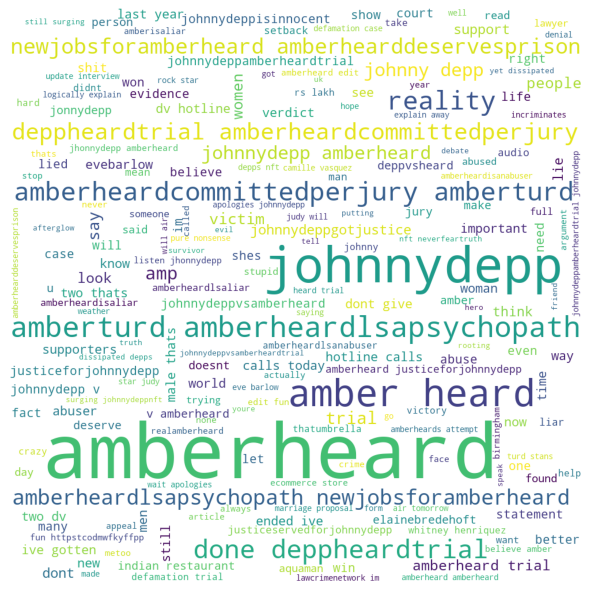

In [167]:
import matplotlib.pyplot as plt

#Plotting the wordcloud image
plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 5. Perform Sentiment Analysis

In [171]:
#Import TextBlob so that I can get the polarity and the subjectivity
from textblob import TextBlob
pol = TextBlob(text).sentiment.polarity
sub = TextBlob(text).sentiment.subjectivity

In [172]:
#Polarity: 1 = positive statement, -1 negative statement
#subjectivity: closer to 1 would be mostly opinion
#For sure the document is not a positive one, but I expected a negative number.
#This is because of the joint words/hashtags. 
#The word cloud above was more useful in giving me the information that I wanted.
print(pol)
print(sub)

0.09185612257130073
0.5146220505152425


## 6. Conclusion

From the analysis of the tweets. It is seen that there were mostly negative attitudes towards Amber Heard. This was obvious in the word cloud. Using TextBlob for sentiment analysis did not work as expected, but this was due to use of hashtags which combined the sentiments with Amber Heard and creating a joint word that is not actually an english word.